In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Integer
df = pd.read_csv('loan_level_500k-Copy1.csv')

In [28]:
df.head()
# A peek at the variables

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,SF,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,SF,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,SF,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,SF,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,SF,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CREDIT_SCORE                      497426 non-null  float64
 1   FIRST_PAYMENT_DATE                500137 non-null  int64  
 2   FIRST_TIME_HOMEBUYER_FLAG         369578 non-null  object 
 3   MATURITY_DATE                     500137 non-null  int64  
 4   METROPOLITAN_STATISTICAL_AREA     429988 non-null  float64
 5   MORTGAGE_INSURANCE_PERCENTAGE     449089 non-null  float64
 6   NUMBER_OF_UNITS                   500134 non-null  float64
 7   OCCUPANCY_STATUS                  500137 non-null  object 
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE   500124 non-null  float64
 9   ORIGINAL_DEBT_TO_INCOME_RATIO     485208 non-null  float64
 10  ORIGINAL_UPB                      500137 non-null  int64  
 11  ORIGINAL_LOAN_TO_VALUE            500128 non-null  f

In [30]:
 df.drop(['PROPERTY_TYPE', 'POSTAL_CODE', 'PRODUCT_TYPE', 'LOAN_SEQUENCE_NUMBER'], axis=1, inplace=True)
    ## Droping fed restricted and irrelavant variables


In [31]:
df.fillna(0, inplace=True)  # missing values 

In [32]:
df.dtypes

CREDIT_SCORE                        float64
FIRST_PAYMENT_DATE                    int64
FIRST_TIME_HOMEBUYER_FLAG            object
MATURITY_DATE                         int64
METROPOLITAN_STATISTICAL_AREA       float64
MORTGAGE_INSURANCE_PERCENTAGE       float64
NUMBER_OF_UNITS                     float64
OCCUPANCY_STATUS                     object
ORIGINAL_COMBINED_LOAN_TO_VALUE     float64
ORIGINAL_DEBT_TO_INCOME_RATIO       float64
ORIGINAL_UPB                          int64
ORIGINAL_LOAN_TO_VALUE              float64
ORIGINAL_INTEREST_RATE              float64
CHANNEL                              object
PREPAYMENT_PENALTY_MORTGAGE_FLAG     object
PROPERTY_STATE                       object
LOAN_PURPOSE                         object
ORIGINAL_LOAN_TERM                    int64
NUMBER_OF_BORROWERS                 float64
SELLER_NAME                          object
SERVICER_NAME                        object
PREPAID                                bool
DELINQUENT                      

In [25]:
#need to convert objects to floats for logistic regression
categorical_columns = ['FIRST_TIME_HOMEBUYER_FLAG', 'OCCUPANCY_STATUS', 'CHANNEL',
                       'PREPAYMENT_PENALTY_MORTGAGE_FLAG', 'PROPERTY_STATE',
                       'LOAN_PURPOSE', 'SELLER_NAME', 'SERVICER_NAME']

boolean_columns = ['PREPAID']


In [33]:
# Define the dependent variable and independent variables
y = df['DELINQUENT']
X = df.drop('DELINQUENT', axis=1)

In [34]:
# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Convert boolean columns to 0 and 1
X[boolean_columns] = X[boolean_columns].astype(int)

In [23]:
X.dtypes

CREDIT_SCORE                          float64
FIRST_PAYMENT_DATE                      int64
MATURITY_DATE                           int64
METROPOLITAN_STATISTICAL_AREA         float64
MORTGAGE_INSURANCE_PERCENTAGE         float64
                                       ...   
SERVICER_NAME_SUNTRUSTMORTGAGE,INC      uint8
SERVICER_NAME_USBANKNA                  uint8
SERVICER_NAME_WASHINGTONMUTUALBANK      uint8
SERVICER_NAME_WELLSFARGOBANK,NA         uint8
SERVICER_NAME_WELLSFARGOHOMEMORTGA      uint8
Length: 149, dtype: object

In [24]:
X.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,...,SERVICER_NAME_NATLCITYMTGECO,SERVICER_NAME_OLDKENTMTGECO,SERVICER_NAME_Other servicers,SERVICER_NAME_PRINCIPALRESIDENTIAL,SERVICER_NAME_PROVIDENTFUNDINGASSO,"SERVICER_NAME_SUNTRUSTMORTGAGE,INC",SERVICER_NAME_USBANKNA,SERVICER_NAME_WASHINGTONMUTUALBANK,"SERVICER_NAME_WELLSFARGOBANK,NA",SERVICER_NAME_WELLSFARGOHOMEMORTGA
0,669.0,200206,202901,0.0,0.0,1.0,80.0,33.0,162000,80.0,...,0,0,1,0,0,0,0,0,0,0
1,732.0,199904,202903,17140.0,0.0,1.0,25.0,10.0,53000,25.0,...,0,0,1,0,0,0,0,0,0,0
2,679.0,200208,202902,15940.0,30.0,1.0,91.0,48.0,133000,91.0,...,0,0,1,0,0,0,0,0,0,0
3,721.0,200209,202902,38060.0,0.0,1.0,39.0,13.0,174000,39.0,...,0,0,1,0,0,0,0,0,0,0
4,618.0,200210,202902,10420.0,25.0,1.0,85.0,24.0,122000,85.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

In [35]:
import statsmodels.api as sm
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#configure the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

#logistic regression model on training data
logistic_model.fit(X_train, y_train)

feature_coefficients = logistic_model.coef_[0]

feature_coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_coefficients})
feature_coefficient_df['Coefficient_Abs'] = abs(feature_coefficient_df['Coefficient'])
feature_coefficient_df = feature_coefficient_df.sort_values(by='Coefficient_Abs', ascending=False)

# Display the sorted feature coefficients
print(feature_coefficient_df)

                              Feature   Coefficient  Coefficient_Abs
9              ORIGINAL_LOAN_TO_VALUE  1.400843e-02     1.400843e-02
6     ORIGINAL_COMBINED_LOAN_TO_VALUE  1.378134e-02     1.378134e-02
4       MORTGAGE_INSURANCE_PERCENTAGE  1.063482e-02     1.063482e-02
7       ORIGINAL_DEBT_TO_INCOME_RATIO  6.449821e-03     6.449821e-03
0                        CREDIT_SCORE -4.052991e-03     4.052991e-03
..                                ...           ...              ...
102       SELLER_NAME_HSBCMTGECORPUSA -3.244220e-07     3.244220e-07
101  SELLER_NAME_HOMESIDE LENDING, IN  2.414429e-07     2.414429e-07
18                          CHANNEL_C  1.805829e-07     1.805829e-07
114  SELLER_NAME_PNCMTGECORPOFAMERICA -5.399985e-08     5.399985e-08
30                  PROPERTY_STATE_DE -3.730965e-09     3.730965e-09

[149 rows x 3 columns]


In [36]:
feature_coefficient_df.head(15)

,Feature,Coefficient,Coefficient_Abs
9,ORIGINAL_LOAN_TO_VALUE,0.014008,0.014008
6,ORIGINAL_COMBINED_LOAN_TO_VALUE,0.013781,0.013781
4,MORTGAGE_INSURANCE_PERCENTAGE,0.010635,0.010635
7,ORIGINAL_DEBT_TO_INCOME_RATIO,0.006450,0.006450
0,CREDIT_SCORE,-0.004053,0.004053
13,PREPAID,-0.001255,0.001255
1,FIRST_PAYMENT_DATE,-0.000605,0.000605
2,MATURITY_DATE,0.000588,0.000588
10,ORIGINAL_INTEREST_RATE,0.000339,0.000339
12,NUMBER_OF_BORROWERS,-0.000321,0.000321


In [ ]:
# Function to perform backward elimination
def backward_elimination(X, y, significance_level=0.05):
    num_vars = len(X.columns)
    for i in range(0, num_vars):
        model = sm.Logit(y, X).fit()
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            max_p_value_idx = model.pvalues.idxmax()
            X = X.drop(max_p_value_idx, axis=1)
            print(f"Removed feature: {max_p_value_idx}, P-value: {max_p_value:.4f}")
        else:
            break
    return X

# Perform backward elimination
selected_features = backward_elimination(X, y)

# Display the selected features
print("Selected Features:")
print(selected_features.columns)

In [ ]:
def backward_elimination(X, y, significance_level=0.0001):
    num_vars = len(X.columns)
    for i in range(0, num_vars):
        model = sm.Logit(y, X).fit()
        max_p_value = max(model.pvalues)
        if max_p_value > significance_level:
            max_p_value_idx = model.pvalues.idxmax()
            X = X.drop(max_p_value_idx, axis=1)
            print(f"Removed feature: {max_p_value_idx}, P-value: {max_p_value:.4f}")
        else:
            break
    return X

# Perform backward elimination
selected_features = backward_elimination(X, y)

# Display the selected features
print("Selected Features:")
print(selected_features.columns)

In [ ]:
number_of_features = selected_features.sum()
print(number_of_features)

In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# missing values with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [38]:
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [39]:
y_pred = model.predict(X_test)

In [40]:
classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)


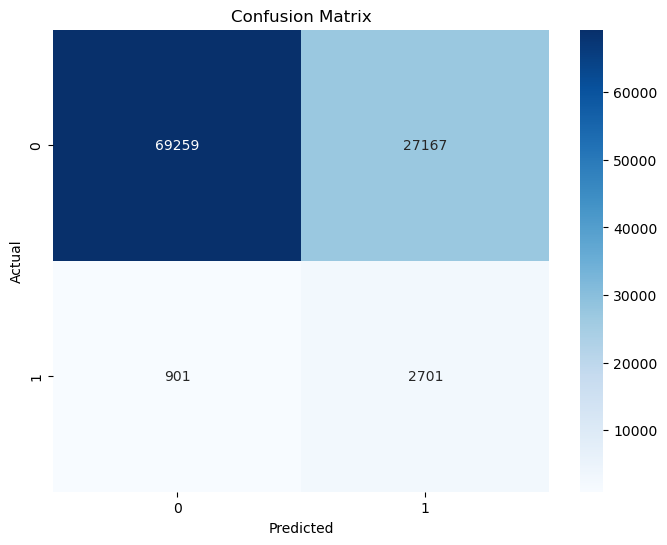

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.72      0.83     96426
        True       0.09      0.75      0.16      3602

    accuracy                           0.72    100028
   macro avg       0.54      0.73      0.50    100028
weighted avg       0.95      0.72      0.81    100028



In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_rep)

In [44]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

# Define your selected features (X) and the target variable (y)
X_1 = X[['CREDIT_SCORE', 'FIRST_PAYMENT_DATE', 'MORTGAGE_INSURANCE_PERCENTAGE', 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'ORIGINAL_LOAN_TO_VALUE', 'ORIGINAL_INTEREST_RATE', 'NUMBER_OF_BORROWERS', 'PREPAID']]


# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Define a custom scoring function using F1 score
scorer = make_scorer(f1_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search.fit(X_1, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(random_state=42, **best_params)
best_xgb_classifier.fit(X_1, y)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=  12.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=  12.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   5.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   5.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   8.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   8.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=  12.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=  11.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   5.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   4.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   4.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   8.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=  12.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=  11.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   5.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=  12.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=  11.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   5.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   4.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   4.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   8.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=  12.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=  11.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   5.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=  12.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   8.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   8.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=  12.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=  11.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   4.9s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   9.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   8.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=  12.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=  11.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   5.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   9.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estima

In [51]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [10, 15, 20],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1', verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Use the best estimator for prediction
y_pred = best_estimator.predict(X_1_test)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters:
{'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 20}


NameError: name 'X_1_test' is not defined

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=15; total time=  18.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=20; total time=  14.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=15; total time=  12.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=20; total time=  14.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=15; total time=  11.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10; total time=  11.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=15; total time=  12.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_es

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10; total time=  17.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=20; total time=  14.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=15; total time=  12.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=20; total time=  14.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=15; total time=  12.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10; total time=  12.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=15; total time=  12.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_es

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10; total time=  17.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=15; total time=  13.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=10; total time=  11.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=15; total time=  12.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=10; total time=  10.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=20; total time=  12.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10; total time=  11.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_es

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=15; total time=  18.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=10; total time=  12.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=10; total time=  12.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=20; total time=  13.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=10; total time=  11.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=20; total time=  12.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=15; total time=  11.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_es

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10; total time=  18.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=20; total time=  14.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=15; total time=  12.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=10; total time=  13.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=15; total time=  12.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=20; total time=  12.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=20; total time=  12.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_es

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=15; total time=  18.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=20; total time=  14.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=15; total time=  12.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=10; total time=  13.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=15; total time=  12.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10; total time=  12.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=15; total time=  12.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_es

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10; total time=  17.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=20; total time=  14.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=10; total time=  12.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=20; total time=  14.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=15; total time=  12.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=20; total time=  12.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=15; total time=  12.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_es

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=10; total time=  17.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=15; total time=  13.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=10; total time=  11.9s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=20; total time=  13.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=10; total time=  11.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=20; total time=  12.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=10; total time=  11.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_es

In [48]:
print(best_params)

{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
